### What is Customer Churning?

#### • It is defined as when customers or subscribers discontinue doing business with a firm or service.

# 2. Loading libraries and data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report




In [24]:
## Loading data
df = pd.read_csv('Telecom_Churn.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# The dataset includes information about:

* Customers who left within the last month
* Services that each customer has signed up for
* Customer account information
* Demographic info about customers.

In [26]:
df.shape

(7043, 21)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [30]:
df.dtypes


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


* Here is one issue that the TotalCharges are defined as object but it must be a number(float, int).

In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Visualize Missing Values.

In [32]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# 5. Data Manipulation.

In [33]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df['TotalCharges'].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


* On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that!

In [35]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce') # error = 'coerce' basically use for - jha par bhi error aa rhi ho conversion ke time pe usko ye null krdega.
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [36]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* It can also be noted that the Tenure column is 0 for these entries even though the MOnthlCharges column is not empty.

#### Let's see if there are any other 0 values in the tenure column.

In [37]:
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

* There are no additionoal missing values in the Tenure column.

##### Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [38]:
df.drop(labels=df[df['tenure']==0].index, axis = 0, inplace = True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [39]:
df.shape

(7032, 20)

• To solve the problem of missing values in TotalCharges column, we decided to fill it with the mean of TotalCharges values.

In [40]:
df.fillna(df['TotalCharges'].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [41]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [42]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [44]:
df['InternetService'].describe(include=['object', 'bool'])

,InternetService
count,7032
unique,3
top,Fiber optic
freq,3096


In [45]:
numerical_cols = ['tenure', 'MonthlyCharges','TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# **Data Visualization:**

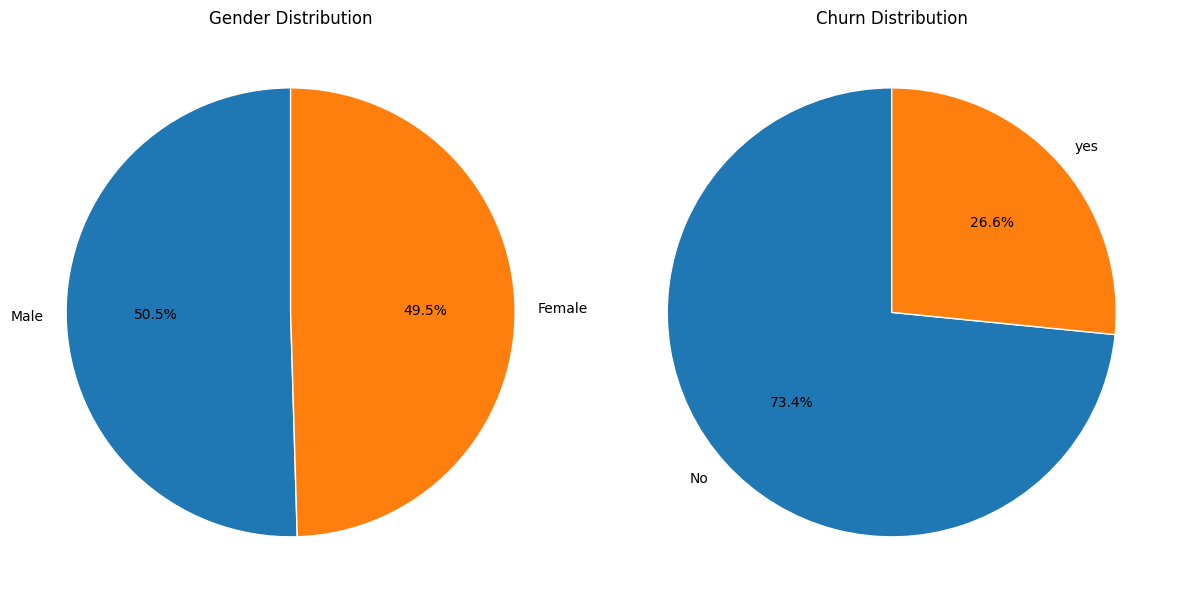

In [46]:
# labels for gender and churn
g_labels = ['Male', 'Female']
c_labels = ['No', 'yes']

# Values for gender and churn
g_values = df['gender'].value_counts()
c_values = df['Churn'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gender Pie Chart
axes[0].pie(g_values, labels=g_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
axes[0].set_title('Gender Distribution')

#Churn Pie Chart
axes[1].pie(c_values, labels=c_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
axes[1].set_title('Churn Distribution')

# Show the Plot
plt.tight_layout()
plt.show()

* 26.6% of customoers switched to another firm.

* Customers are 49.5% female and 50.5% male.


In [47]:
df['Churn'][df['Churn']== "Yes"].count()

np.int64(1869)

In [48]:
df['Churn'][df['Churn']== "No"].groupby(by=df['gender']).count()

,Churn
gender,
Female,2544
Male,2619


In [49]:
df['Churn'][df['Churn']== "Yes"].groupby(by=df['gender']).count()

,Churn
gender,
Female,939
Male,930


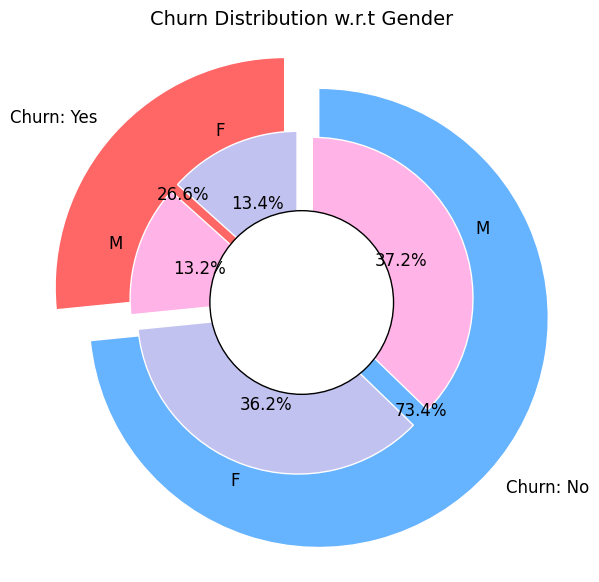

In [50]:
# Data for outer pie chart (Churn Distribution)
labels = ["Churn: Yes", "Churn: No"]
values = [1869, 5163]
colors = ["#ff6666", "#66b3ff"]
explode = (0.1, 0.1) # Slight explosion for better visibility

# Data for inner pie chart (gender-Wise Churn distribution)
labels_gender = ["F", "M", "F", "M"]
sizes_gender = [939, 930, 2544, 2619]
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']
explode_gender = (0.05, 0.05, 0.05, 0.05)

# Create figure
fig, ax = plt.subplots(figsize=(7,7))

# Outer Pie Chart (Churn DIstribution)
ax.pie(values, labels=labels, autopct="%1.1f%%", colors=colors, explode=explode, startangle=90, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white'})

# Inner Pie Chart (Gender-wise Churn Distribution)
ax.pie(sizes_gender, labels=labels_gender, autopct="%1.1f%%", colors=colors_gender, explode=explode_gender, startangle=90,radius = 0.7, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white'})

# Draw a center circle to create a donut effect
centre_circle = plt.Circle((0,0), 0.4, fc='white', edgecolor='black')
ax.add_artist(centre_circle)

# Title
plt.title("Churn Distribution w.r.t Gender", fontsize=14)

# Equal aspect ratio to ensure the pie is circular
plt.axis('equal')
plt.show()

* There is negligible difference in customer percentage/ count who changed the service provider. Both genders behaved in similar fashion when it comes to migrating to another service previderfirm.

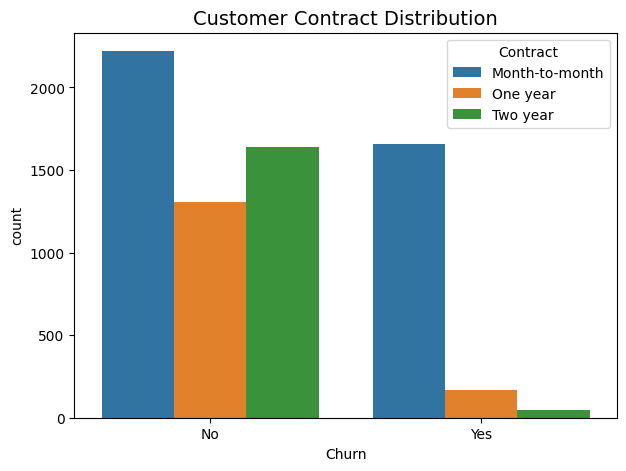

In [51]:
# Create the grouped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="Contract")

# Add title
plt.title("Customer Contract Distribution", fontsize = 14)

# Show the plot
plt.show()

* About 75% of Customers with Month-to-Month Contraact opted to more out as compared to 13% of customers with One Year COntract and 3% with Two Year Contract.

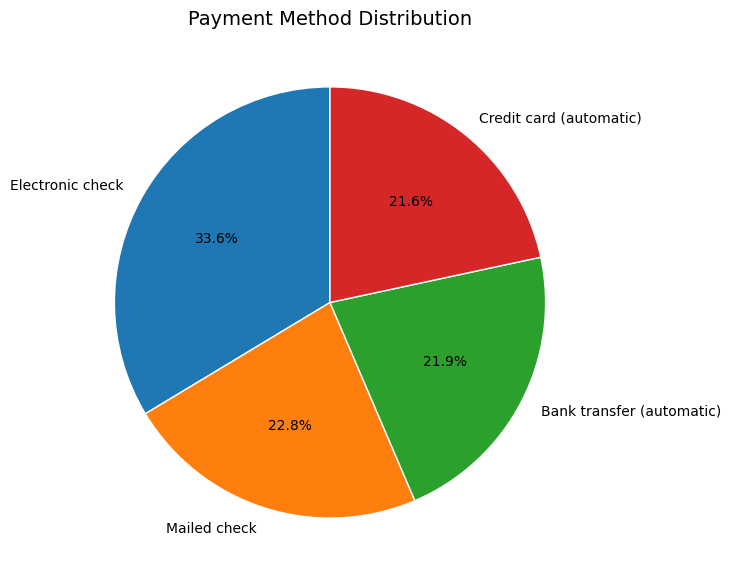

In [52]:
# Data for pie Chart
labels = df['PaymentMethod'].value_counts().index
values = df['PaymentMethod'].value_counts().values

# Create the pie chart
plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Add title
plt.title("Payment Method Distribution", fontsize = 14)

# Show the plot
plt.show()

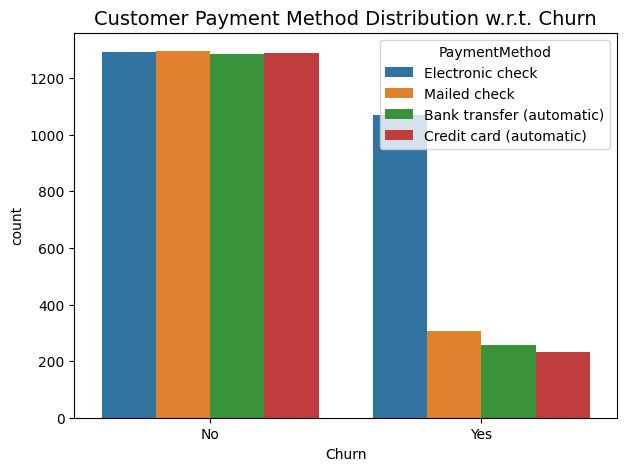

In [53]:
# Create a the grouped bar plot

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="PaymentMethod")

# Add title
plt.title("Customer Payment Method Distribution w.r.t. Churn", fontsize = 14)

# Show the plot
plt.show()

* Major Customers are opting out were having Electronic Check as Payment Mehtod.
* Customers who opted for Credit-Card Automatic transfer or Bank Autometic Transfer and Mailed Check as Payment Method were less likely to move out.

In [54]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [56]:
df[df["gender"] == "Male"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,992
Fiber optic,No,910
No,No,717
Fiber optic,Yes,633
DSL,Yes,240
No,Yes,57


In [57]:
df[df["gender"] == "Female"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,965
Fiber optic,No,889
No,No,690
Fiber optic,Yes,664
DSL,Yes,219
No,Yes,56


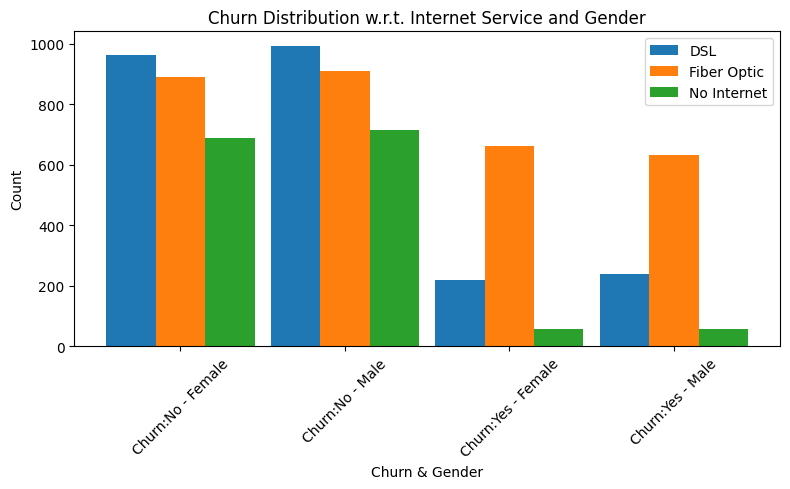

In [58]:
# Data
categories = ['Churn:No - Female', 'Churn:No - Male', "Churn:Yes - Female", "Churn:Yes - Male"]
dsl_values = [965, 992, 219, 240]
fiber_values = [889, 910, 664, 633]
no_internet_values = [690, 717, 56, 57]

# Set bar width and x positions
x = np.arange(len(categories))
bar_width = 0.3

# Create Figure
plt.figure(figsize=(8, 5))

# Plot bars
plt.bar(x - bar_width, dsl_values, width=bar_width, label='DSL')
plt.bar(x, fiber_values, width=bar_width, label='Fiber Optic')
plt.bar(x + bar_width, no_internet_values, width=bar_width, label='No Internet')

# Add labels and title
plt.xticks(x, categories, rotation=45)
plt.xlabel("Churn & Gender")
plt.ylabel("Count")
plt.title("Churn Distribution w.r.t. Internet Service and Gender")
plt.legend()

# Show Plot
plt.tight_layout()
plt.show()

* A lot of Customers choose the Fiber optic service and It's also evident that the customers who use Fiber optic have high churn rate and suggest a dissatisfaction with this type of internet service.

* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

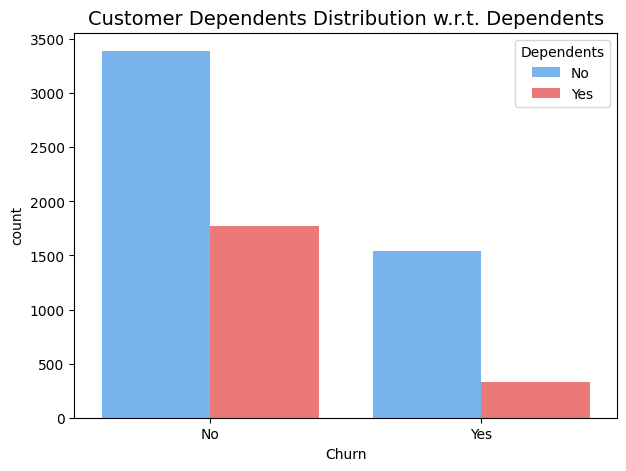

In [59]:
# Define color Palette for "Dependents" categories

color_map = {"Yes" : "#ff6666", "No" : "#66b3ff"}

# Cretae the groped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="Dependents", palette=color_map)

# Add title
plt.title("Customer Dependents Distribution w.r.t. Dependents", fontsize = 14)

# SHow
plt.show()

* Customers without dependents are more likely to churn.

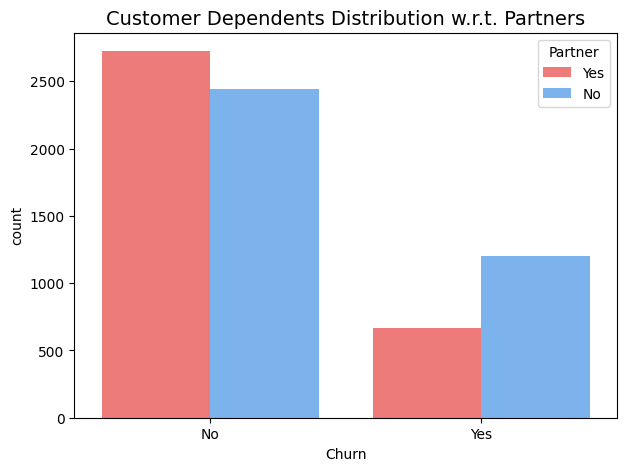

In [60]:
# Define color Palette for "Partner" categories

color_map = {"Yes" : "#ff6866", "No" : "#69b3ff"}

# Cretae the groped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="Partner", palette=color_map)

# Add title
plt.title("Customer Dependents Distribution w.r.t. Partners", fontsize = 14)

# SHow
plt.show()

* Customers that doesn't have partners are more likely to churn.

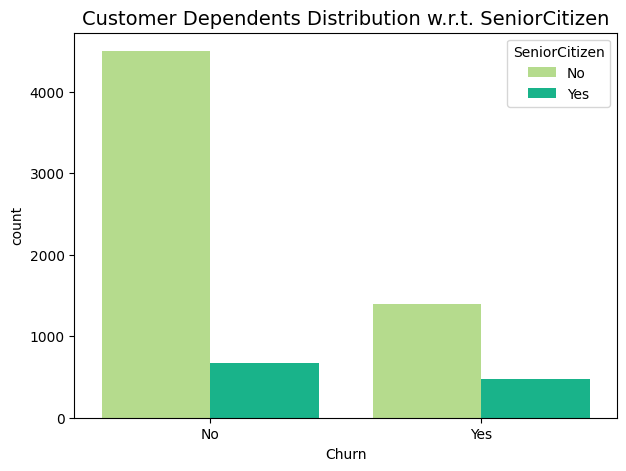

In [61]:
# Define color palette for 'SeniorCitizen' categories
color_map = {"Yes" : "#00CC96", "No" : "#B6E880"}

# Cretae the groped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="SeniorCitizen", palette=color_map)

# Add title
plt.title("Customer Dependents Distribution w.r.t. SeniorCitizen", fontsize = 14)

# SHow
plt.show()

* It can be observed that the fraction of senior citizen is very less.
* Most of the senior Citizens churn.

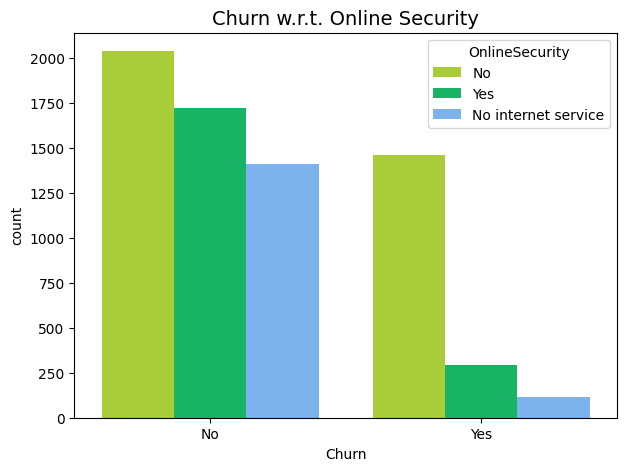

In [62]:
# Define color palette including "No Internet Service"
color_map = {"Yes" : "#00CC66", "No" : "#B6E620", "No internet service": "#69b3ff"} #Added missing key

# Cretae the groped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="OnlineSecurity", palette=color_map)

# Add title
plt.title("Churn w.r.t. Online Security", fontsize = 14)

# SHow
plt.show()

* Most customers churn in the absence of online security.


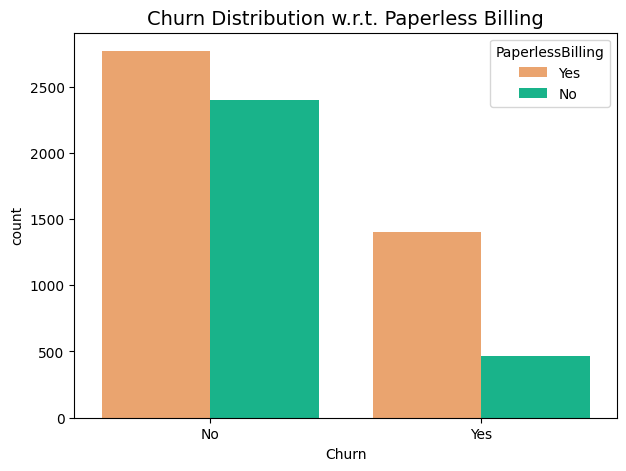

In [63]:
# Define color palette for 'PaperlessBilling' categories
color_map = {"Yes" : "#FFA15A", "No" : "#00CC96"}

# Cretae the groped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="PaperlessBilling", palette=color_map)

# Add title
plt.title("Churn Distribution w.r.t. Paperless Billing", fontsize = 14)

# SHow
plt.show()

* Customers with paperless Billing are most likely to churn.

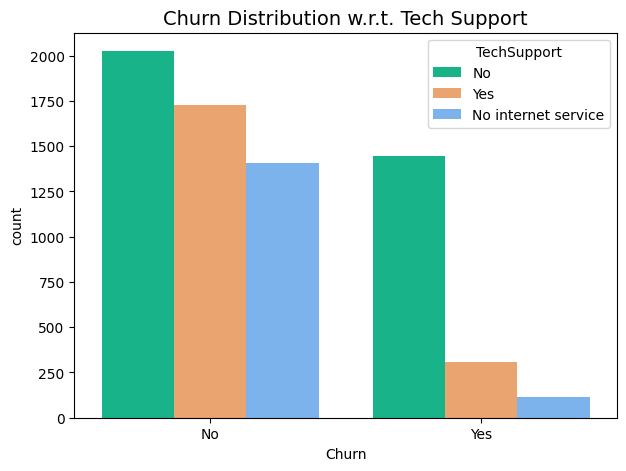

In [64]:
# Define color palette for 'TechSupport' categories
color_map = {"Yes" : "#FFA15A", "No" : "#00CC96", "No internet service": "#69b3ff"}

# Cretae the groped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="TechSupport", palette=color_map)

# Add title
plt.title("Churn Distribution w.r.t. Tech Support", fontsize = 14)

# SHow
plt.show()

* Customers with no TechSupport are most likely to migrate to another service provider.

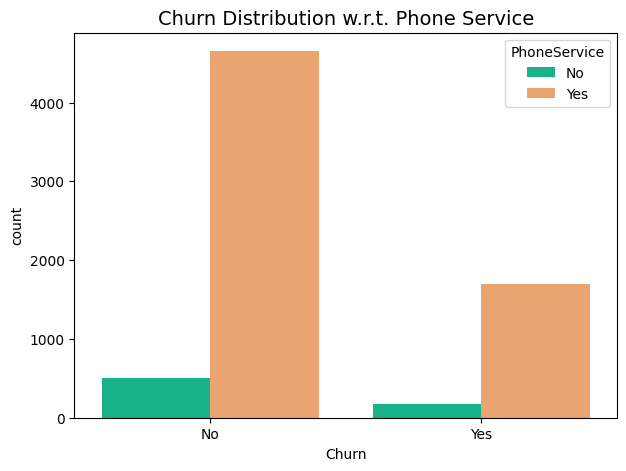

In [66]:
# Define color palette for PhoneService categories
color_map = {"Yes" : "#FFA15A", "No" : "#00CC96"}

# Cretae the groped bar plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="Churn", hue="PhoneService", palette=color_map)

# Add title
plt.title("Churn Distribution w.r.t. Phone Service", fontsize = 14)

# SHow
plt.show()

* Very small fraction of customers don't have a phone service and out of that, 1/3rd customers are more likely to churn.

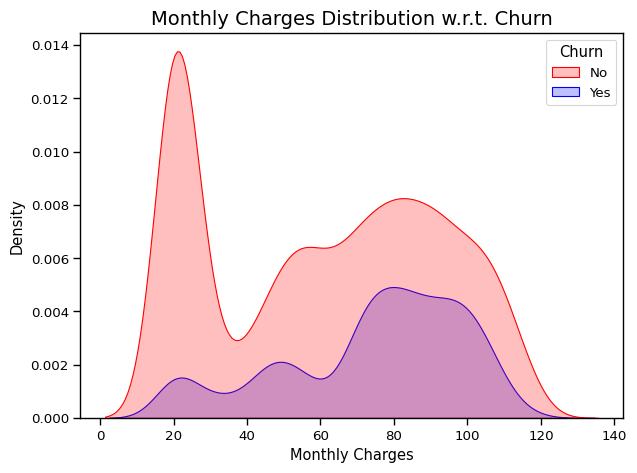

In [67]:
# Set seaborn style
sns.set_context("paper", font_scale=1.1)

# Create the KDE plot
plt.figure(figsize=(7, 5))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", shade=True, palette={"No":"Red", "Yes":"Blue"})

# Add labels and title
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.title("Monthly Charges Distribution w.r.t. Churn", fontsize = 14)

# Show the plot
plt.show()

* Customers with high Monthly charges are also more likely to churn.

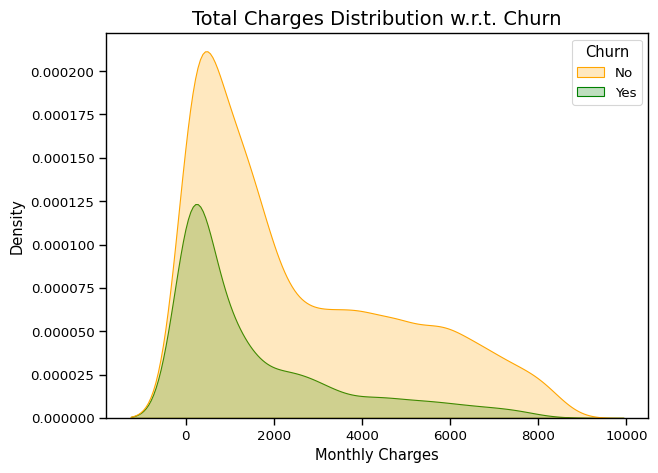

In [68]:
# Set seaborn style
sns.set_context("paper", font_scale=1.1)

# Create the KDE plot
plt.figure(figsize=(7, 5))
sns.kdeplot(data=df, x="TotalCharges", hue="Churn", shade=True, palette={"No":"Orange", "Yes":"Green"})

# Add labels and title
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.title("Total Charges Distribution w.r.t. Churn", fontsize = 14)

# Show the plot
plt.show()

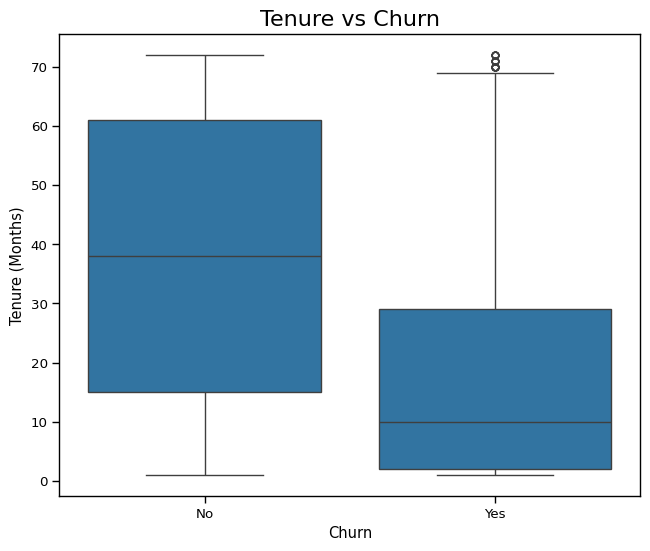

In [69]:
# Create the box plot
plt.figure(figsize=(7.5, 6))
sns.boxplot(data=df, x="Churn", y="tenure")

# Add title and labels
plt.title("Tenure vs Churn", fontsize=16, fontfamily="Cousier New")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")

# Show the plot
plt.show()

* New Customers are more likely to churn.

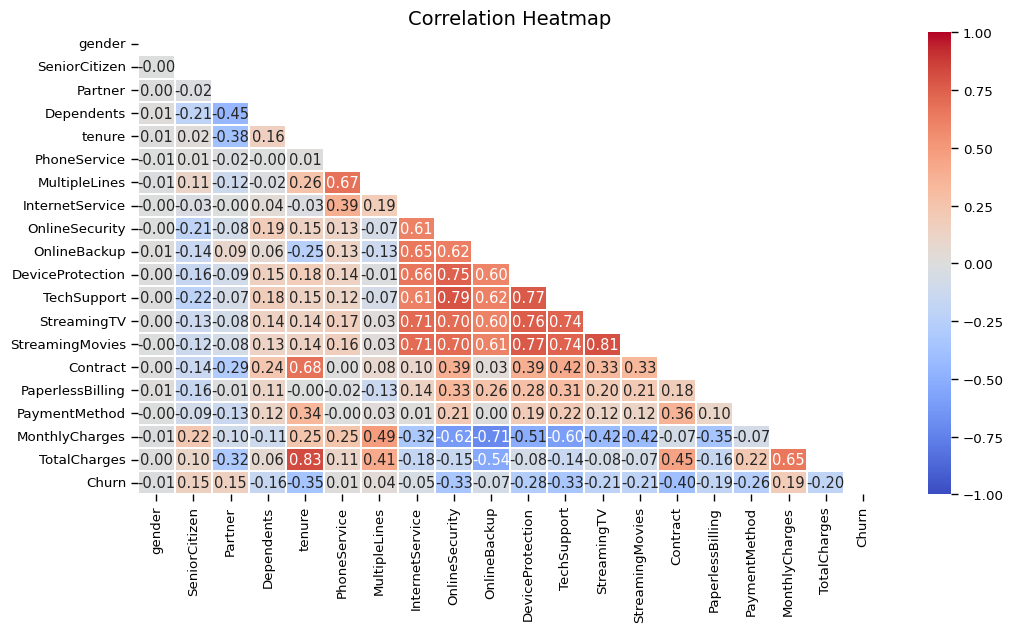

In [ ]:
# Compute the correlation matrix with factorized categorical data
corr = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x).corr()

# Create the mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create the heatmap
plt.figure(figsize=(12, 6)) # Reduced size for better readability
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidth=0.2, vmin=-1, vmax=1)

# Add title
plt.title("Correlation Heatmap", fontsize=14)

# Show the plot
plt.show()

#7.  Data Preprocessing

* Splitting the data into train and test sets

In [70]:
def object_to_int(dataframe_series):
  if dataframe_series.dtype=='object':
    dataframe_series = LabelEncoder().fit_transform(dataframe_series)
  return dataframe_series

In [71]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [72]:
plt.figure(figsize=(14, 7))
df.corr()['Churn'].sort_values(ascending = False)

,Churn
Churn,1.000000
MonthlyCharges,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
PaymentMethod,0.107852
MultipleLines,0.038043
PhoneService,0.011691
gender,-0.008545
StreamingTV,-0.036303
StreamingMovies,-0.038802


<Figure size 1400x700 with 0 Axes>

In [73]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [74]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [75]:
def distplot(feature, frame, color='r'):
  plt.figure(figsize=(8, 3))
  plt.title("Distribution for {}".format(feature))
  ax = sns.distplot(frame[feature], color=color)


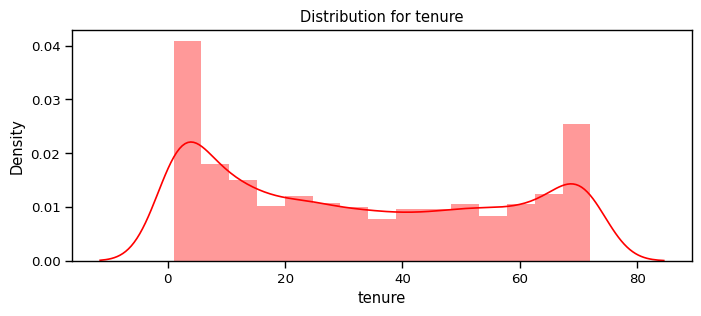

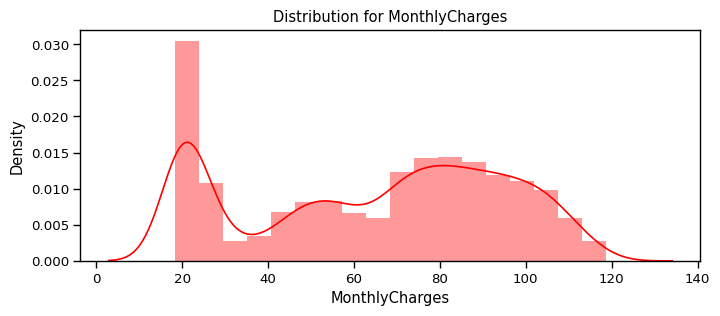

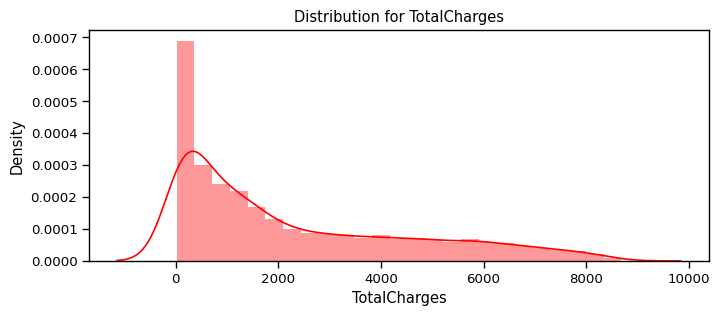

In [76]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

* SInce the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

#### **Standardizing the numeric attributes.**

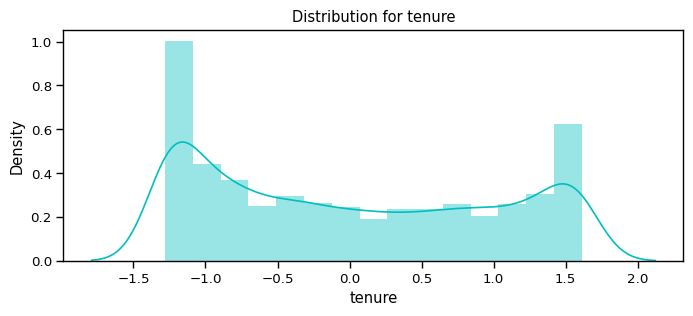

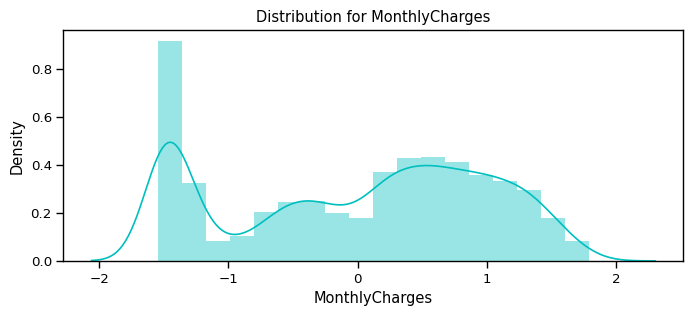

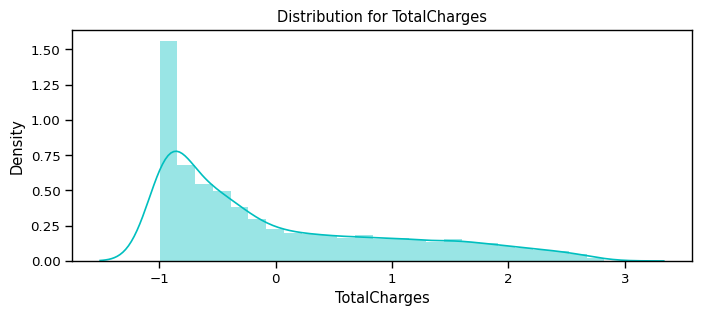

In [77]:
from sklearn.preprocessing import StandardScaler

df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')), columns = num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [78]:
# Divide the columns into 3 categories, one of or standardisation, one for Label encoding and one for one hot encoding

cat_cols_ohe = ['PaymentMethod', 'Contract',  'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) # those that need label encoding

In [79]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 8. Machine Learning Model Evaluations and Predictions

#### **KNN**

In [81]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train, y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test, y_test)
print("KNN accuracy:", accuracy_knn)

KNN accuracy: 0.7654584221748401


In [82]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1033
           1       0.56      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407



## **SVC**

In [84]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train, y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test, y_test)
print("SVM accuracy is :", accuracy_svc)

SVM accuracy is : 0.7860696517412935


In [85]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



## **Random Forest**

In [88]:
model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1, random_state = 50, max_features="sqrt", max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.7889125799573561


In [89]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



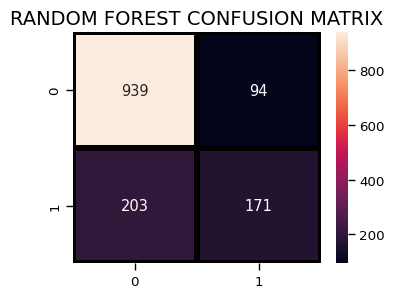

In [90]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, prediction_test), annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.show()

## **Logistic Regression**

In [91]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
accuracy_lr = lr_model.score(X_test, y_test)
print("Logistic Regression accuracy is :", accuracy_lr)

Logistic Regression accuracy is : 0.7931769722814499


In [93]:
lr_pred = lr_model.predict(X_test)
report = classification_report(y_test, lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



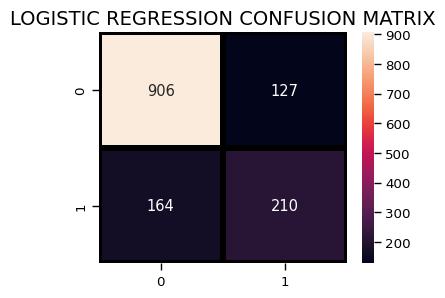

In [95]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX", fontsize=14)
plt.show()

## **Decision Tree Classifier**


In [96]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test, y_test)
print("Decision Tree accuracy is :", accuracy_dt)

Decision Tree accuracy is : 0.7235252309879175


* Decision Tree gives very low score.

In [97]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.73      1407

